
# Anonymization of mental health medical records

### Introduction to Natural Language Processing - Final Project

to:

Alexander(Sasha) Apartsin, PhD

by:  
   
Uriel Atzmon, id 209307172  
Victoria Chuykina, id 321544512  


# Exploratory Data Analysis (EDA) for Clinical-Personal Mental Health Dataset
This notebook performs an in-depth exploratory data analysis (EDA) on the updated dataset containing clinical and personal mental health information extracted from therapist notes and structured question-answer fields.

The purpose of this EDA is to:
- Understand the structure, distribution, and richness of the data
- Explore the relationship between personal and clinical text content
- Identify patterns in question types and answers
- Detect potential anomalies or irregularities in patient responses


### Dataset Structure

The dataset includes:
- **Therapist notes**: Free-text summaries of each patient's case.
- **Structured questions and answers**:
  - `PQ_#`: Personal questions (e.g., background, location, family)
  - `PA_#`: Personal answers
  - `CQ_#`: Clinical diagnostic questions
  - `CA_#`: Clinical answers
- **Disorder**: The diagnosed mental health condition per patient.

Each row represents one patient. Text fields vary in length and semantic content, which makes both distributional and textual analyses important.


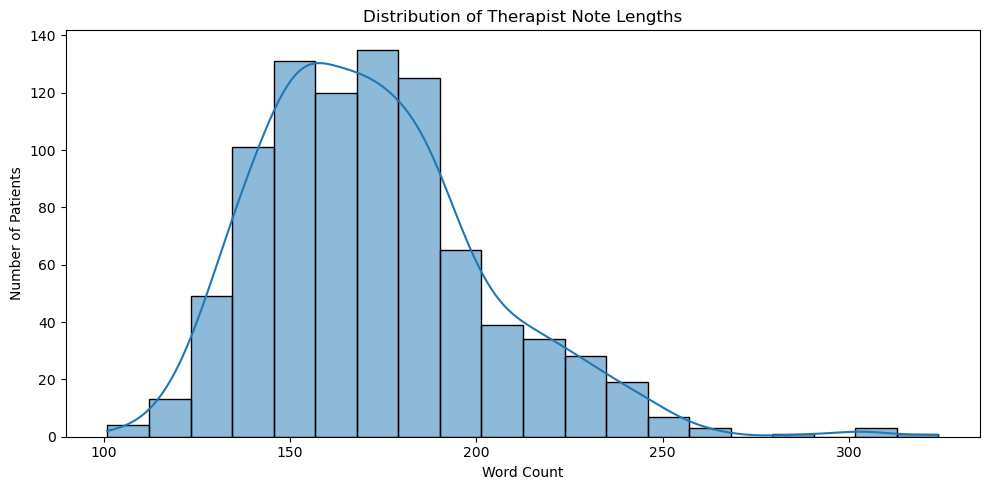

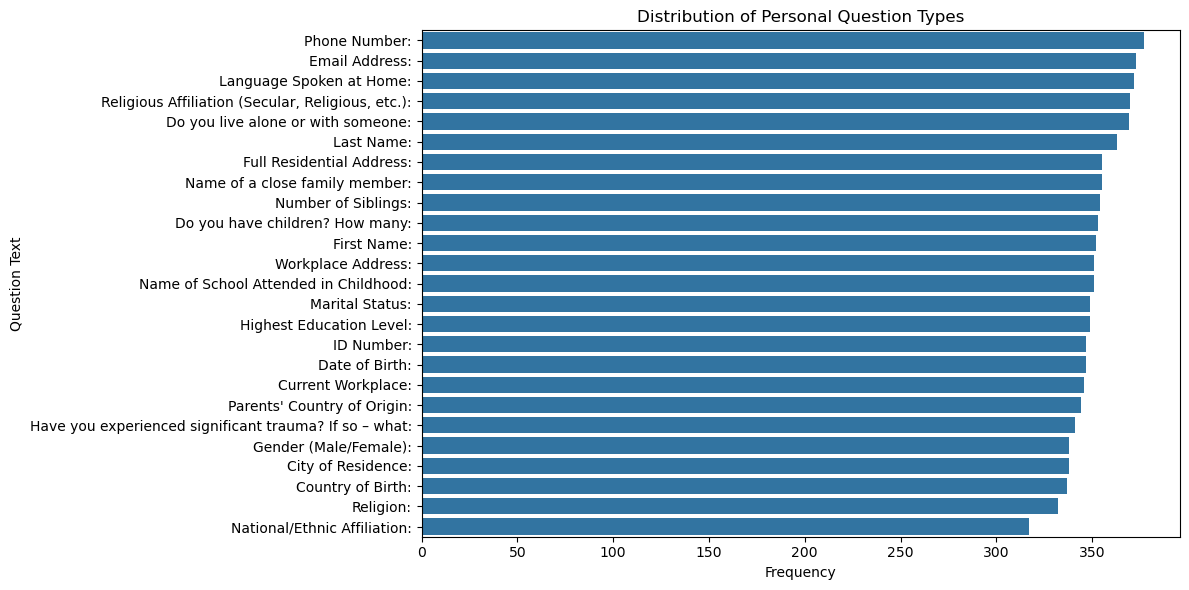

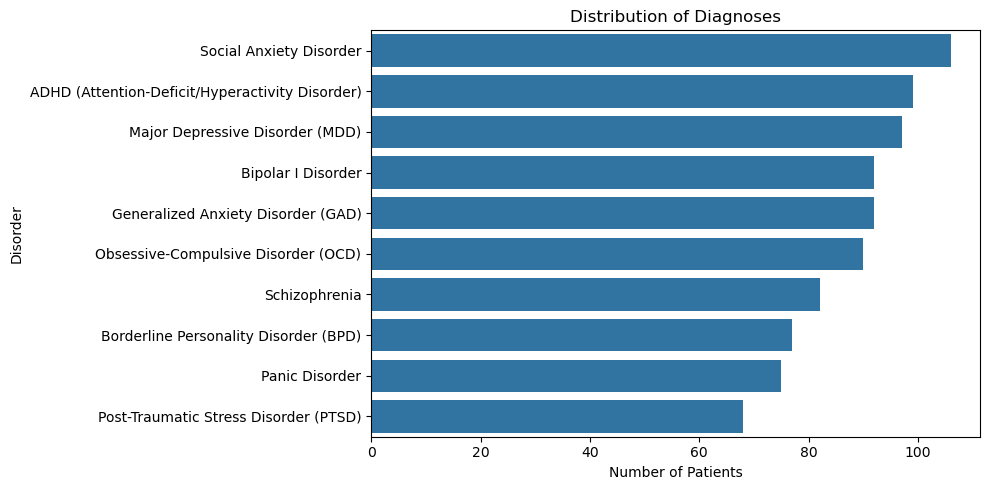

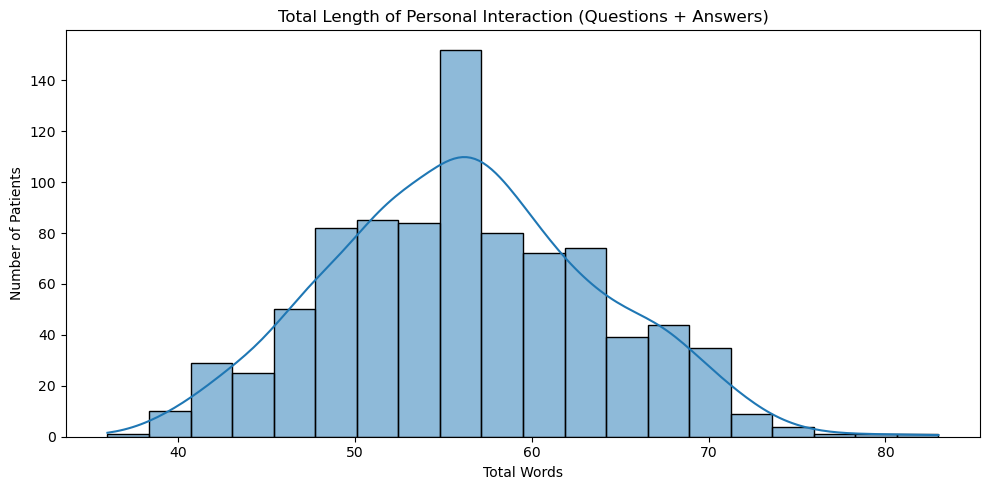

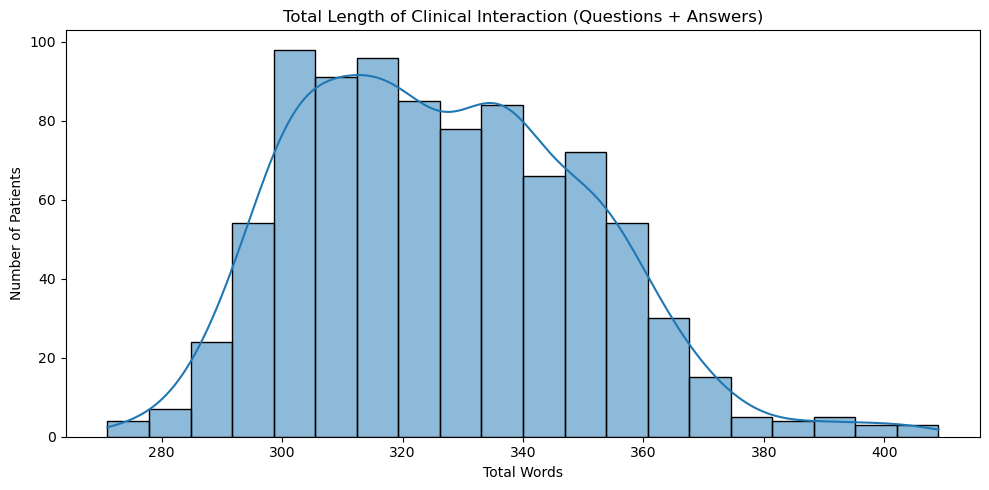

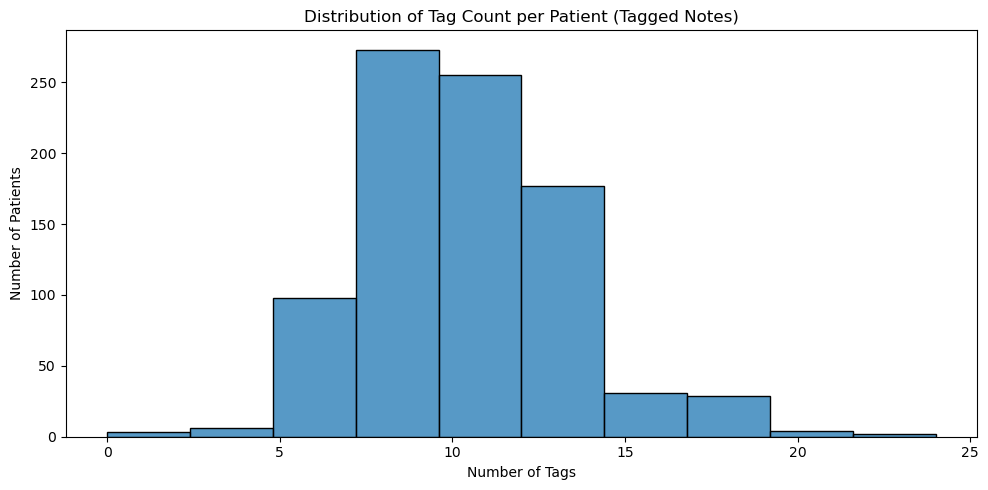

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the updated dataset (contains Tagged_Note column)
df = pd.read_csv("generated_patient_data_with_tagged_notes.csv")

# Clean possible artifacts
df = df.drop(columns=['Unnamed: 42'], errors='ignore')

# Identify relevant columns
pq_cols = [col for col in df.columns if col.startswith('PQ_')]
pa_cols = [col for col in df.columns if col.startswith('PA_')]
cq_cols = [col for col in df.columns if col.startswith('CQ_')]
ca_cols = [col for col in df.columns if col.startswith('CA_')]

# ============================
# Compute: Therapist note length (in words)
# ============================
df['Note_Length'] = df['Therapist_Note'].apply(lambda x: len(str(x).split()))

# ============================
# Compute: Total text lengths
# ============================
df['PQ_Lengths'] = df[pq_cols].apply(lambda row: sum(len(str(q).split()) for q in row if pd.notnull(q)), axis=1)
df['PA_Lengths'] = df[pa_cols].apply(lambda row: sum(len(str(a).split()) for a in row if pd.notnull(a)), axis=1)
df['CQ_Lengths'] = df[cq_cols].apply(lambda row: sum(len(str(q).split()) for q in row if pd.notnull(q)), axis=1)
df['CA_Lengths'] = df[ca_cols].apply(lambda row: sum(len(str(a).split()) for a in row if pd.notnull(a)), axis=1)

df['Total_Personal_Text_Length'] = df['PQ_Lengths'] + df['PA_Lengths']
df['Total_Clinical_Text_Length'] = df['CQ_Lengths'] + df['CA_Lengths']

# ============================
# Compute: Number of tags per patient
# ============================
df['Tag_Count'] = df['Tagged_Note'].apply(
    lambda x: len(re.findall(r"\[\[[A-Z]+:[^\]]+\]\]", str(x))) if pd.notnull(x) else 0
)

# ============================
# Plot 1: Distribution of therapist note lengths
# ============================
plt.figure(figsize=(10, 5))
sns.histplot(df['Note_Length'], bins=20, kde=True)
plt.title('Distribution of Therapist Note Lengths')
plt.xlabel('Word Count')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

# ============================
# Plot 2: Frequency of personal question types
# ============================
pq_values = df[pq_cols].apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y=pq_values.index, x=pq_values.values)
plt.title('Distribution of Personal Question Types')
plt.xlabel('Frequency')
plt.ylabel('Question Text')
plt.tight_layout()
plt.show()

# ============================
# Plot 3: Distribution of diagnoses
# ============================
plt.figure(figsize=(10, 5))
sns.countplot(y='Disorder', data=df, order=df['Disorder'].value_counts().index)
plt.title('Distribution of Diagnoses')
plt.xlabel('Number of Patients')
plt.ylabel('Disorder')
plt.tight_layout()
plt.show()

# ============================
# Plot 4: Total personal interaction length
# ============================
plt.figure(figsize=(10, 5))
sns.histplot(df['Total_Personal_Text_Length'], bins=20, kde=True)
plt.title('Total Length of Personal Interaction (Questions + Answers)')
plt.xlabel('Total Words')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

# ============================
# Plot 5: Total clinical interaction length
# ============================
plt.figure(figsize=(10, 5))
sns.histplot(df['Total_Clinical_Text_Length'], bins=20, kde=True)
plt.title('Total Length of Clinical Interaction (Questions + Answers)')
plt.xlabel('Total Words')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

# ============================
# Plot 6: Number of tags per patient
# ============================
plt.figure(figsize=(10, 5))
sns.histplot(df['Tag_Count'], bins=10, kde=False)
plt.title('Distribution of Tag Count per Patient (Tagged Notes)')
plt.xlabel('Number of Tags')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()


C:\Users\simlab\AppData\Local\Temp\ipykernel_22060\2271076977.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pa_lengths = df[pa_cols].applymap(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
C:\Users\simlab\AppData\Local\Temp\ipykernel_22060\2271076977.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ca_lengths = df[ca_cols].applymap(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
C:\Users\simlab\AppData\Local\Temp\ipykernel_22060\2271076977.py:32: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


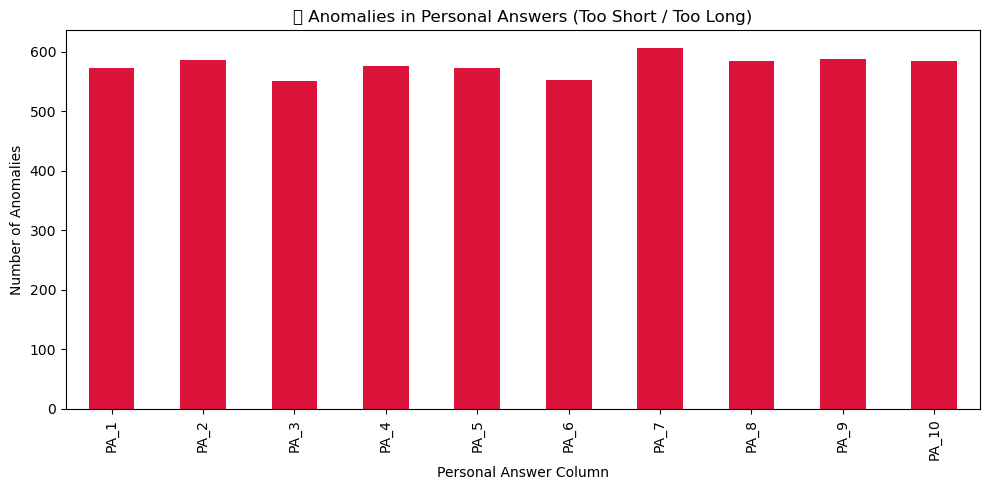

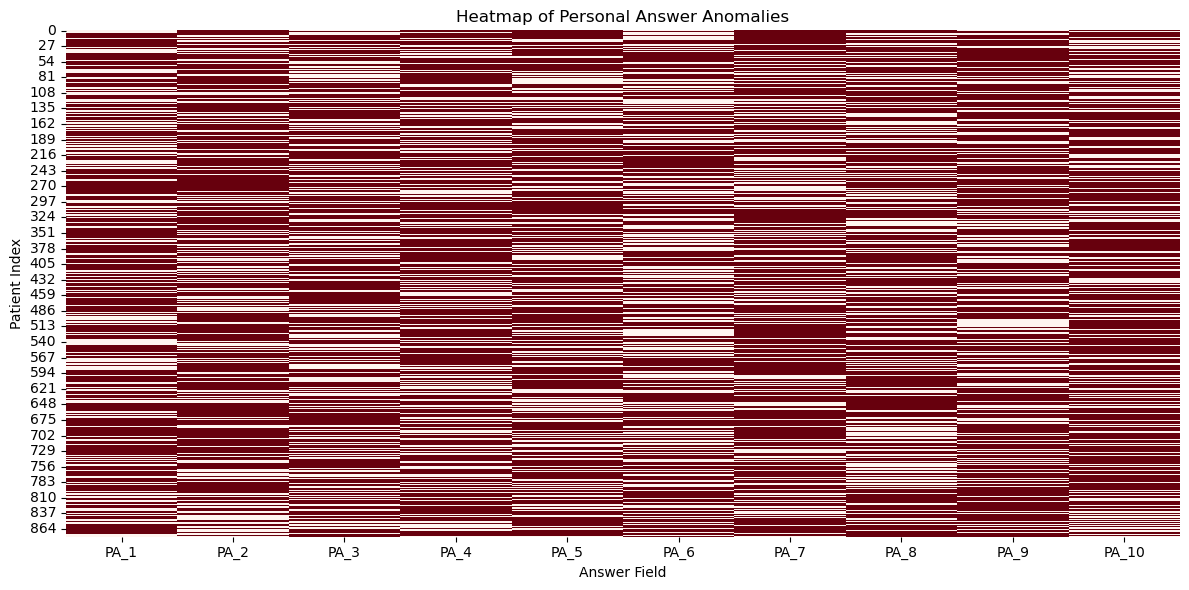


🧾 Most common PA answers:
633x - 123 Main Street, Anytown, USA...
595x - Catholic...
362x - Smith...
329x - I live alone....
326x - Female...

🧾 Most common CA answers:
37x - Yes, the patient has started avoiding crowded places and stressful situations to...
31x - Yes, the patient frequently taps their foot and shifts in their seat during appo...
26x - Yes, the patient has sought help for managing their symptoms by scheduling an ap...
23x - Yes, the patient reports experiencing sudden, intense episodes of fear accompani...
23x - Yes, the patient reports experiencing intrusive thoughts about harming their lov...


C:\Users\simlab\AppData\Local\Temp\ipykernel_22060\2271076977.py:66: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_info_pa = df[pa_cols].applymap(is_noninformative)
C:\Users\simlab\AppData\Local\Temp\ipykernel_22060\2271076977.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_info_ca = df[ca_cols].applymap(is_noninformative)


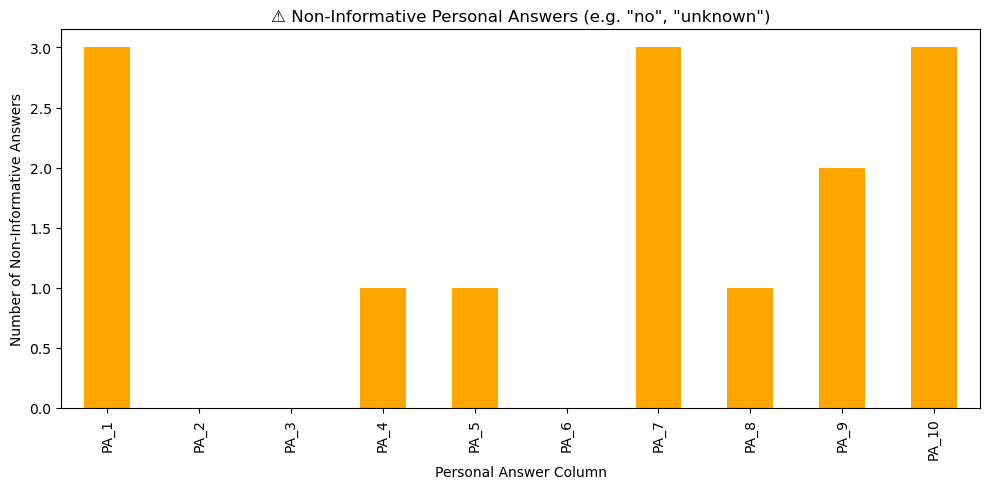

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load updated dataset
df = pd.read_csv("generated_patient_data_with_tagged_notes.csv")

# Clean possible artifact
df = df.drop(columns=['Unnamed: 42'], errors='ignore')

# Define relevant columns
pa_cols = [col for col in df.columns if col.startswith('PA_')]
ca_cols = [col for col in df.columns if col.startswith('CA_')]

# ========== 1. LENGTH-BASED ANOMALIES ==========

# Word count per answer
pa_lengths = df[pa_cols].applymap(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
ca_lengths = df[ca_cols].applymap(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# Define thresholds for anomalies
pa_anomalies = (pa_lengths < 3) | (pa_lengths > 100)
ca_anomalies = (ca_lengths < 3) | (ca_lengths > 150)

# Plot: anomaly count per PA column
plt.figure(figsize=(10, 5))
pa_anomalies.sum().plot(kind='bar', color='crimson')
plt.title('🔍 Anomalies in Personal Answers (Too Short / Too Long)')
plt.ylabel('Number of Anomalies')
plt.xlabel('Personal Answer Column')
plt.tight_layout()
plt.show()

# Plot: heatmap of PA anomalies
plt.figure(figsize=(12, 6))
sns.heatmap(pa_anomalies, cbar=False, cmap='Reds')
plt.title('Heatmap of Personal Answer Anomalies')
plt.xlabel('Answer Field')
plt.ylabel('Patient Index')
plt.tight_layout()
plt.show()

# ========== 2. COMMON REPETITIONS ==========

all_pa = pd.Series(df[pa_cols].values.ravel()).dropna()
all_ca = pd.Series(df[ca_cols].values.ravel()).dropna()

common_pa = Counter(all_pa).most_common(5)
common_ca = Counter(all_ca).most_common(5)

print("\n🧾 Most common PA answers:")
for ans, count in common_pa:
    print(f"{count}x - {ans[:80]}...")

print("\n🧾 Most common CA answers:")
for ans, count in common_ca:
    print(f"{count}x - {ans[:80]}...")

# ========== 3. NON-INFORMATIVE RESPONSES ==========

def is_noninformative(text):
    text = str(text).strip().lower()
    return text in ['', 'n/a', 'no', 'none', 'unknown']

non_info_pa = df[pa_cols].applymap(is_noninformative)
non_info_ca = df[ca_cols].applymap(is_noninformative)

# Plot: non-informative personal answers
plt.figure(figsize=(10, 5))
non_info_pa.sum().plot(kind='bar', color='orange')
plt.title('⚠️ Non-Informative Personal Answers (e.g. "no", "unknown")')
plt.ylabel('Number of Non-Informative Answers')
plt.xlabel('Personal Answer Column')
plt.tight_layout()
plt.show()


📈 Pearson correlation (personal vs. clinical length): r = 0.04, p = 0.2321
🏷️ Pearson correlation (tag count vs. note length): r = 0.10, p = 0.0033


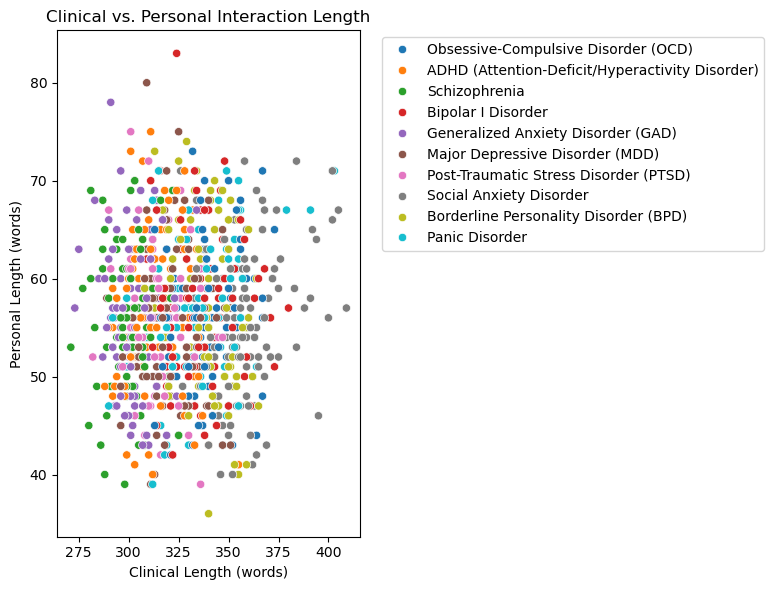

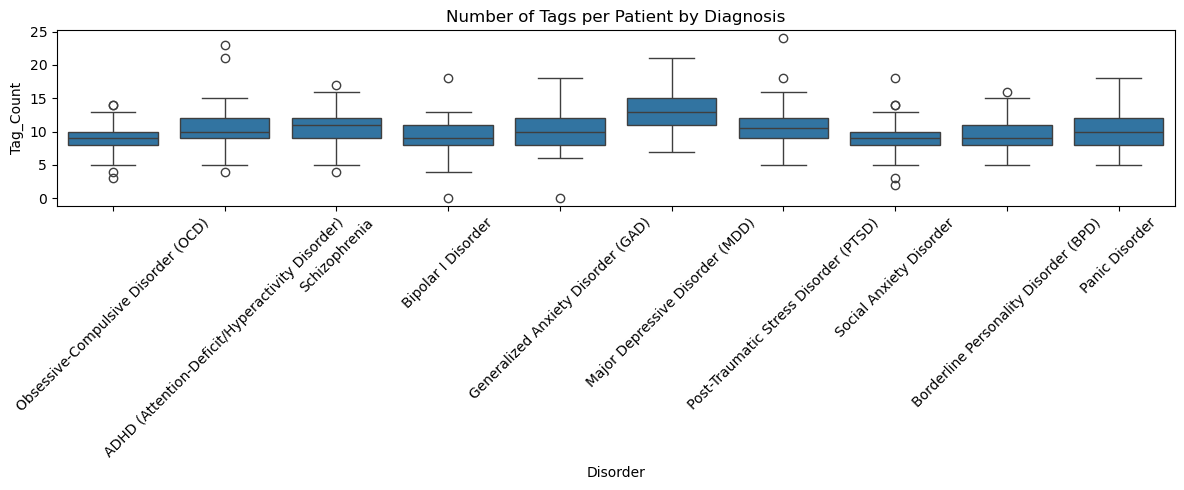

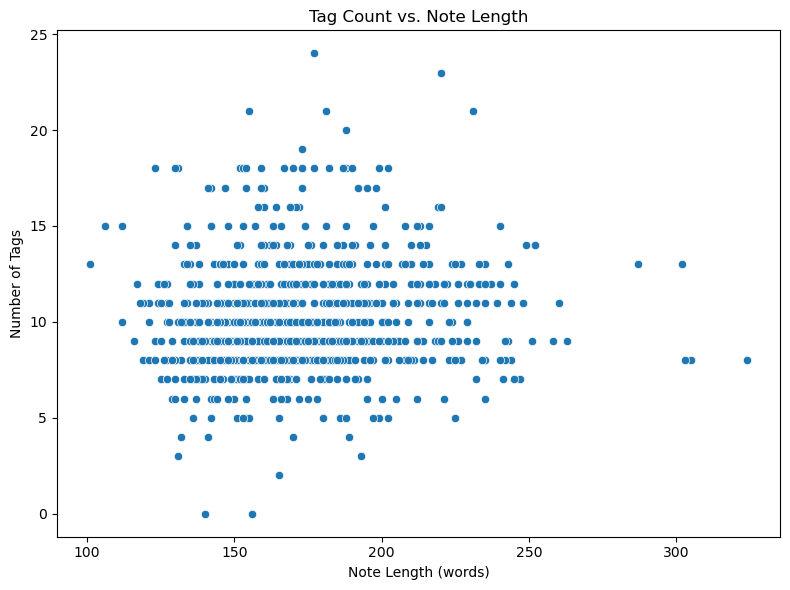

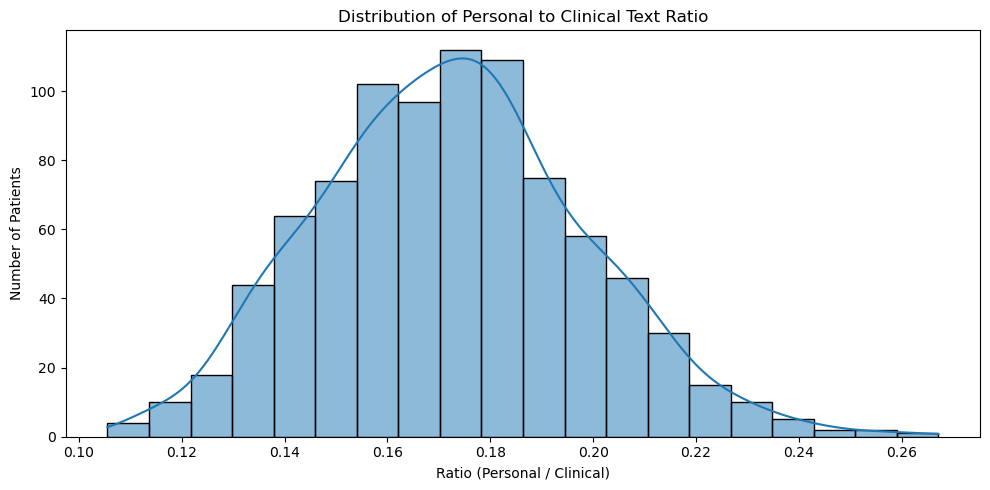

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import re

# Load dataset
df = pd.read_csv("generated_patient_data_with_tagged_notes.csv")
df = df.drop(columns=['Unnamed: 42'], errors='ignore')

# Define column groups
pq_cols = [col for col in df.columns if col.startswith('PQ_')]
pa_cols = [col for col in df.columns if col.startswith('PA_')]
cq_cols = [col for col in df.columns if col.startswith('CQ_')]
ca_cols = [col for col in df.columns if col.startswith('CA_')]

# Compute lengths
df['Note_Length'] = df['Therapist_Note'].apply(lambda x: len(str(x).split()))
df['PQ_Lengths'] = df[pq_cols].apply(lambda row: sum(len(str(q).split()) for q in row if pd.notnull(q)), axis=1)
df['PA_Lengths'] = df[pa_cols].apply(lambda row: sum(len(str(a).split()) for a in row if pd.notnull(a)), axis=1)
df['CQ_Lengths'] = df[cq_cols].apply(lambda row: sum(len(str(q).split()) for q in row if pd.notnull(q)), axis=1)
df['CA_Lengths'] = df[ca_cols].apply(lambda row: sum(len(str(a).split()) for a in row if pd.notnull(a)), axis=1)

df['Total_Personal_Length'] = df['PQ_Lengths'] + df['PA_Lengths']
df['Total_Clinical_Length'] = df['CQ_Lengths'] + df['CA_Lengths']

# ===========================
# TAGGED NOTE PROCESSING
# ===========================
df['Tag_Count'] = df['Tagged_Note'].apply(
    lambda x: len(re.findall(r"\[\[[A-Z]+:[^\]]+\]\]", str(x))) if pd.notnull(x) else 0
)

# ===========================
# Correlation: Personal vs Clinical
# ===========================
corr, p_value = pearsonr(df['Total_Personal_Length'], df['Total_Clinical_Length'])
print(f"📈 Pearson correlation (personal vs. clinical length): r = {corr:.2f}, p = {p_value:.4f}")

# ===========================
# Correlation: Tag count vs Total note length
# ===========================
corr_tag, p_tag = pearsonr(df['Tag_Count'], df['Note_Length'])
print(f"🏷️ Pearson correlation (tag count vs. note length): r = {corr_tag:.2f}, p = {p_tag:.4f}")

# ===========================
# Scatter Plot: Clinical vs Personal
# ===========================
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Total_Clinical_Length', y='Total_Personal_Length', hue='Disorder')
plt.title('Clinical vs. Personal Interaction Length')
plt.xlabel('Clinical Length (words)')
plt.ylabel('Personal Length (words)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ===========================
# Boxplot: Tag count by diagnosis
# ===========================
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Disorder', y='Tag_Count')
plt.title('Number of Tags per Patient by Diagnosis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ===========================
# Scatter Plot: Tag Count vs Total Text
# ===========================
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Note_Length', y='Tag_Count')
plt.title('Tag Count vs. Note Length')
plt.xlabel('Note Length (words)')
plt.ylabel('Number of Tags')
plt.tight_layout()
plt.show()

# ===========================
# Ratio: Personal / Clinical
# ===========================
df['Personal_to_Clinical_Ratio'] = df['Total_Personal_Length'] / (df['Total_Clinical_Length'] + 1)

plt.figure(figsize=(10, 5))
sns.histplot(df['Personal_to_Clinical_Ratio'], bins=20, kde=True)
plt.title('Distribution of Personal to Clinical Text Ratio')
plt.xlabel('Ratio (Personal / Clinical)')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()


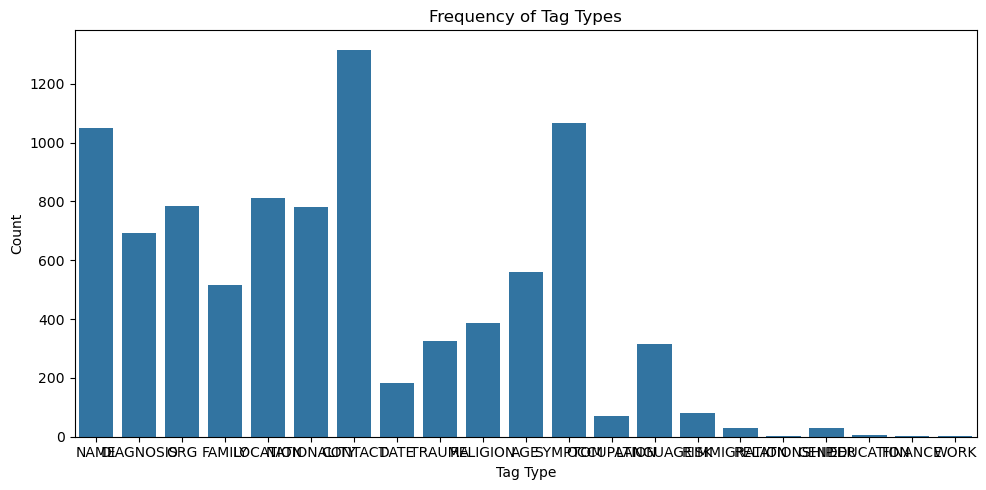

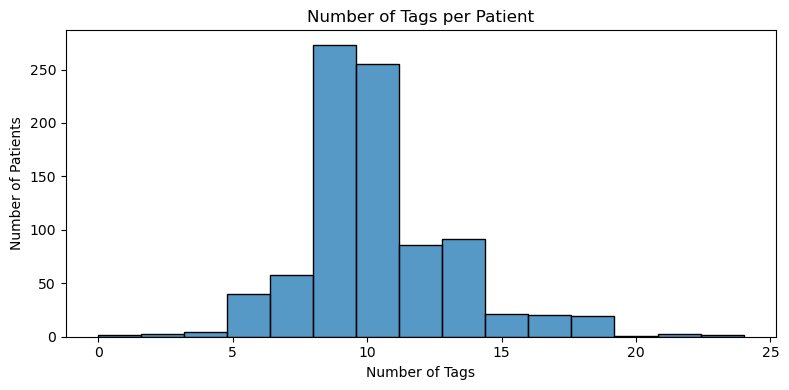


🔠 Most Common Tagged Values:
246x - English
226x - 32
218x - United States
217x - Caucasian
178x - (555) 123-4567
174x - secular
172x - trauma
171x - Sarah Johnson
154x - (555) 555-5555
142x - John Doe


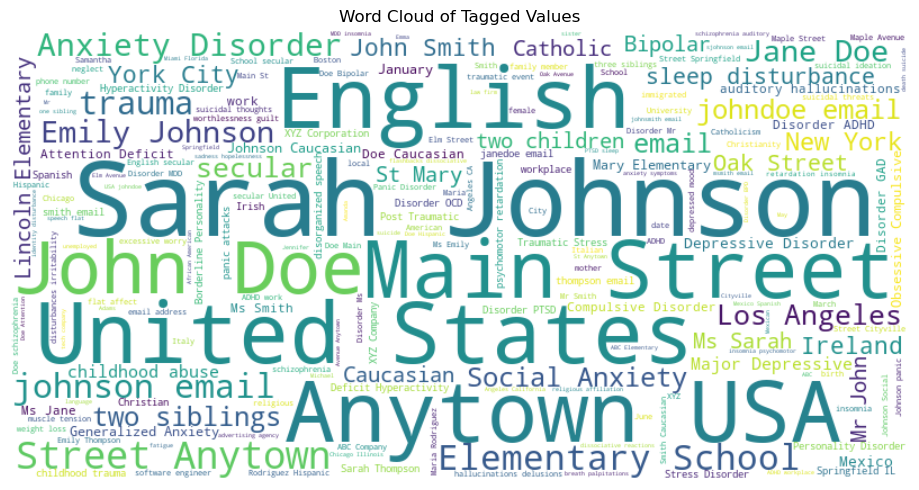

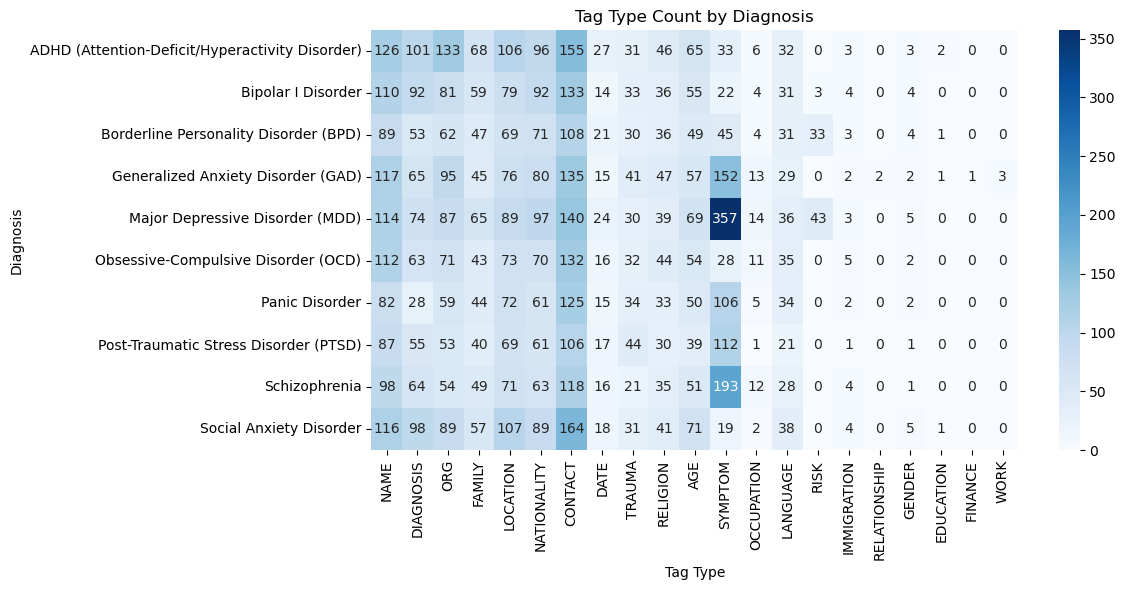

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv("generated_patient_data_with_tagged_notes.csv")
df = df.drop(columns=['Unnamed: 42'], errors='ignore')

# ==============================
# 1. Extract all tags
# ==============================

def extract_tags(text):
    return re.findall(r"\[\[([A-Z]+):([^\]]+)\]\]", str(text))

df['Extracted_Tags'] = df['Tagged_Note'].apply(extract_tags)

# Flatten all tags across patients
all_tags = sum(df['Extracted_Tags'].tolist(), [])

# Separate tag types and contents
tag_types = [t[0] for t in all_tags]
tag_values = [t[1] for t in all_tags]

# ==============================
# 2. Count frequency of each tag type
# ==============================

tag_type_counts = Counter(tag_types)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(tag_type_counts.keys()), y=list(tag_type_counts.values()))
plt.title("Frequency of Tag Types")
plt.xlabel("Tag Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ==============================
# 3. Distribution of tag count per patient
# ==============================

df['Tag_Count'] = df['Extracted_Tags'].apply(len)

plt.figure(figsize=(8, 4))
sns.histplot(df['Tag_Count'], bins=15)
plt.title('Number of Tags per Patient')
plt.xlabel('Number of Tags')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

# ==============================
# 4. Most common tag values (across types)
# ==============================

tag_value_counts = Counter(tag_values)
common_tag_values = tag_value_counts.most_common(10)

print("\n🔠 Most Common Tagged Values:")
for val, count in common_tag_values:
    print(f"{count}x - {val}")

# ==============================
# 5. Wordcloud of all tagged values
# ==============================

text_blob = " ".join(tag_values)
wc = WordCloud(width=800, height=400, background_color='white').generate(text_blob)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Tagged Values")
plt.tight_layout()
plt.show()

# ==============================
# 6. Heatmap of tag type counts per diagnosis
# ==============================

# Create tag type count per row
def tag_type_count_dict(tag_list):
    counter = Counter(t[0] for t in tag_list)
    return dict(counter)

tag_type_df = df['Extracted_Tags'].apply(tag_type_count_dict).apply(pd.Series).fillna(0)
tag_type_df['Disorder'] = df['Disorder']

grouped = tag_type_df.groupby('Disorder').sum()

plt.figure(figsize=(12, 6))
sns.heatmap(grouped, annot=True, fmt='g', cmap='Blues')
plt.title('Tag Type Count by Diagnosis')
plt.xlabel('Tag Type')
plt.ylabel('Diagnosis')
plt.tight_layout()
plt.show()
